# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 4: *GenerateSegmentationDataSet*
Generate an image set for image segmentation
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import plotImageL, plotImageF

# Generate sysntetic data functions
from SyntheticImagesUtilities import createLineImagesAndMasks,  createCurveImagesAndMasks, createCircleImagesAndMasks

# In tensor flow images are numpy arrays
import numpy as np

# For save data
import pickle

# Iteration and Maths
from random import randint,uniform

### Parameters:
    pathToDir = Directory to store data
    imageSize = Image size
    noiseKernelSize = Size of noise filter
    
    lineLengthMin, lineLengthMax = Size of line shape
    curveLengthMin, curveLengthMax = Size of curve shape
    radiousMin, radiousMax = Size of circle shape

    numTrainImages = Number of train images per shape in the training set
    numTestImages = Number of test images per shape in the test set

    dataSetFileName = Name of the data file

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter4/Input/")

imageSize = 32
noiseKernelSize = 3

lineLengthMin = 19
lineLengthMax = 24

curveLengthMin = 18
curveLengthMax = 24

radiousMin = 7
radiousMax = 10

numTrainImages = 400
numTestImages = 40
dataSetFileName = "ShapesSegmentationData.pickle"

### Suffle images function

In [3]:
def SuffleImages(trainImagesSet):
    images = []
    masks = []
    
    while len(trainImagesSet) != 0:
        selectClass = randint(0, len(trainImagesSet)-1)
        
        image = trainImagesSet[selectClass][0].pop(0)
        mask = trainImagesSet[selectClass][1].pop(0)
        
        images.append(image)
        masks.append(mask)
        
        if len(trainImagesSet[selectClass][0]) == 0:
            trainImagesSet.pop(selectClass)
            
    return images, masks

### Create and save dataset

In [4]:
trainLineImages, testLineImages, trainLineMasks, testLineMasks = createLineImagesAndMasks(numTrainImages, numTestImages, lineLengthMin, lineLengthMax, imageSize, noiseKernelSize)
trainCurveImages, testCurveImages, trainCurveMasks, testCurveMasks  = createCurveImagesAndMasks(numTrainImages, numTestImages, curveLengthMin, curveLengthMax, imageSize, noiseKernelSize)
trainCircleImages, testCircleImages, trainCircleMasks, testCircleMasks  = createCircleImagesAndMasks(numTrainImages, numTestImages, radiousMin, radiousMax, imageSize, noiseKernelSize)

# Suffle
trainImages = []
trainMasks = []
testImages = []
testMasks = []

trainImages, trainMasks=  SuffleImages([(trainLineImages, trainLineMasks), (trainCurveImages, trainCurveMasks), (trainCircleImages, trainCircleMasks)])
testImages, testMasks=  SuffleImages([(testLineImages, testLineMasks), (testCurveImages, testCurveMasks), (testCircleImages, testCircleMasks)])

# Save
data = (np.array(trainImages), np.array(trainMasks), np.array(testImages), np.array(testMasks))
with open(pathToDir+dataSetFileName, 'wb') as f:
    pickle.dump(data, f)

### Load and show images

(1200, 32, 32) (1200, 32, 32) (120, 32, 32) (120, 32, 32)


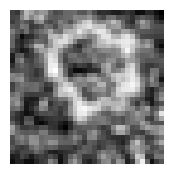

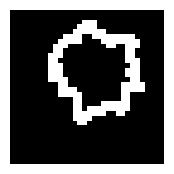

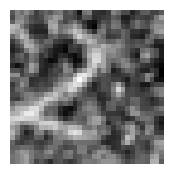

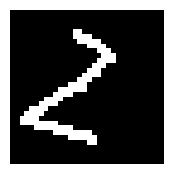

In [5]:
with open(pathToDir+dataSetFileName, 'rb') as f:
     data = pickle.load(f)

trainImages, trainMasks, testImages, testMasks = data 

print(trainImages.shape, trainMasks.shape, testImages.shape, testMasks.shape)

plotImageF(trainImages[1], figureSize = 2)
plotImageF(trainMasks[1], figureSize = 2)

plotImageF(testImages[1], figureSize = 2)
plotImageF(testMasks[1], figureSize = 2)